In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
%load_ext tensorboard

In [ ]:
!unzip '/content/drive/My Drive/Covid19Pred/Dataset_kaggle.zip'

Archive:  /content/drive/My Drive/Covid19Pred/Dataset_kaggle.zip
   creating: Dataset_kaggle/
   creating: Dataset_kaggle/COVID/
 extracting: Dataset_kaggle/COVID/Covid (1).png  
  inflating: Dataset_kaggle/COVID/Covid (10).png  
  inflating: Dataset_kaggle/COVID/Covid (100).png  
  inflating: Dataset_kaggle/COVID/Covid (1000).png  
  inflating: Dataset_kaggle/COVID/Covid (1001).png  
  inflating: Dataset_kaggle/COVID/Covid (1002).png  
  inflating: Dataset_kaggle/COVID/Covid (1003).png  
  inflating: Dataset_kaggle/COVID/Covid (1004).png  
  inflating: Dataset_kaggle/COVID/Covid (1005).png  
  inflating: Dataset_kaggle/COVID/Covid (1006).png  
  inflating: Dataset_kaggle/COVID/Covid (1007).png  
  inflating: Dataset_kaggle/COVID/Covid (1008).png  
  inflating: Dataset_kaggle/COVID/Covid (1009).png  
  inflating: Dataset_kaggle/COVID/Covid (101).png  
  inflating: Dataset_kaggle/COVID/Covid (1010).png  
  inflating: Dataset_kaggle/COVID/Covid (1011).png  
  inflating: Dataset_kaggle/CO

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
yes=os.listdir('/content/Dataset_kaggle/COVID')
no=os.listdir('/content/Dataset_kaggle/non-COVID')

In [ ]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [ ]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])

In [ ]:
data_target

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
data

array(['Covid (559).png', 'Covid (1211).png', 'Covid (775).png', ...,
       'Non-Covid (1066).png', 'Non-Covid (236).png',
       'Non-Covid (509).png'], dtype='<U20')

In [ ]:
yes_values=os.listdir('/content/Dataset_kaggle/COVID')
no_values=os.listdir('/content/Dataset_kaggle/non-COVID')

In [ ]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/Dataset_kaggle/COVID/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/Dataset_kaggle/non-COVID/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
X = np.squeeze(X_data)

In [ ]:
# normalize data
X = X.astype('float32')
X /= 255

In [ ]:
data_target

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
len(data)

2481

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X, data_target, test_size=0.2, random_state=0)

In [ ]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

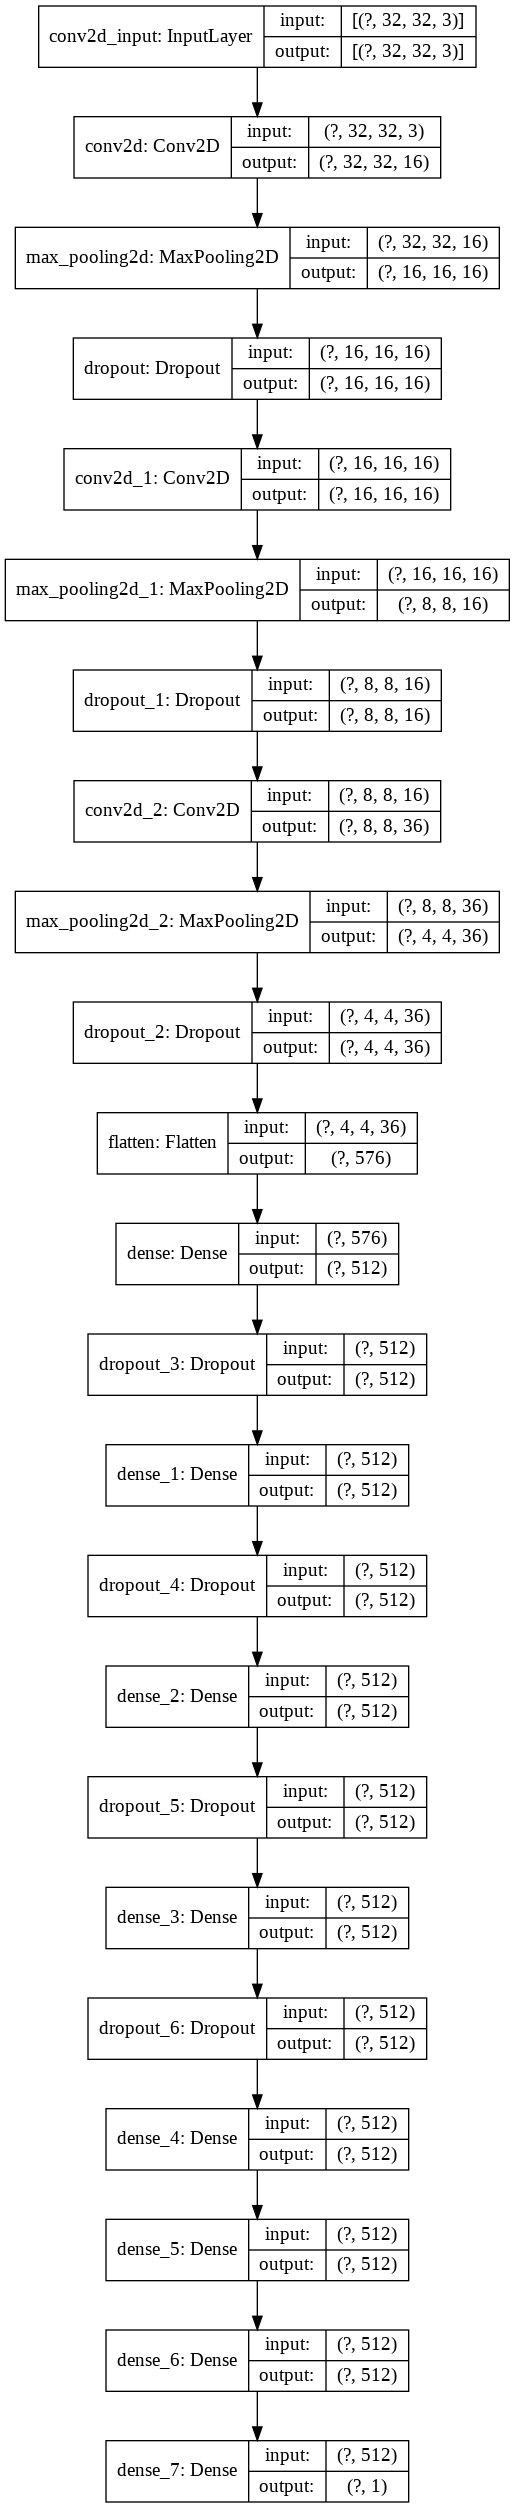

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True)

In [ ]:
!rm -rf ./logs/ 
import datetime

In [ ]:
 model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
history=model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=1000,
         validation_data=(x_test, y_test),
         callbacks=[tensorboard_callback])

Epoch 1/1000
 1/16 [>.............................] - ETA: 0s - loss: 0.6934 - acc: 0.5078WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
16/16 [==============================] - 1s 60ms/step - loss: 0.6947 - acc: 0.4965 - val_loss: 0.6931 - val_acc: 0.4990
Epoch 2/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.6936 - acc: 0.4929 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 3/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.6931 - acc: 0.5055 - val_loss: 0.6932 - val_acc: 0.5010
Epoch 4/1000
16/16 [==============================] - 0s 29ms/step - loss: 0.6932 - acc: 0.5055 - val_loss: 0.6932 - val_acc: 0.5010
Epoch 5/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.6932 - acc: 0.5055 - val_loss: 0.693

In [ ]:

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
model.save('Corona_v3.h5')

In [ ]:
y_hat = model.predict(x_test)

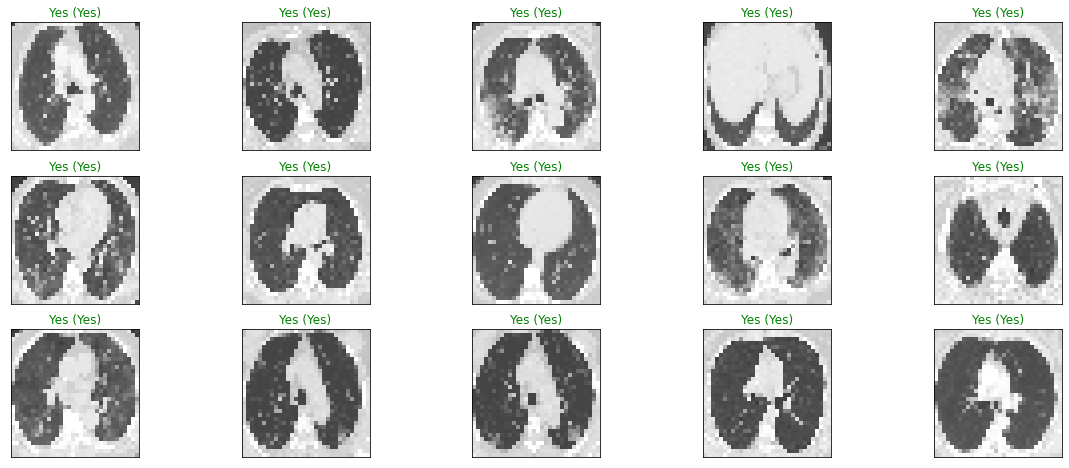

In [ ]:

labels =["Yes",  # index 0
        "No",      # index 1
        ]
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[2], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test, y_hat.round()))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
print(metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       248
           1       0.95      0.97      0.96       249

    accuracy                           0.96       497
   macro avg       0.96      0.96      0.96       497
weighted avg       0.96      0.96      0.96       497

0.9942511983417541


In [ ]:
#from keras.models import load_model
#model.save('CoronaV3.h5')

In [ ]:
!pip install keract

In [ ]:
def preprocess_image(img_path, model=None, rescale=255, resize=(256, 256)):
    """
    Preprocesses a given image for prediction with a trained model, with rescaling and resizing options
    
    Arguments:
            img_path: The path to the image file
            rescale: A float or integer indicating required rescaling. 
                    The image array will be divided (scaled) by this number.
            resize: A tuple indicating desired target size. 
                    This should match the input shape as expected by the model
    Returns:
            img: A processed image.
    """
    from keras.preprocessing.image import img_to_array, load_img
    import cv2
    import numpy as np

    assert type(img_path) == str, "Image path must be a string"
    assert (
        type(rescale) == int or type(rescale) == float
    ), "Rescale factor must be either a float or int"
    assert (
        type(resize) == tuple and len(resize) == 2
    ), "Resize target must be a tuple with two elements"

    img = load_img(img_path)
    img = img_to_array(img)
    img = img / float(rescale)
    img = cv2.resize(img, resize)
    if model != None:
        if len(model.input_shape) == 4:
            img = np.expand_dims(img, axis=0)

    return img
from keract import display_activations,get_activations
# The image path
img_path = '/content/Dataset_kaggle/COVID/Covid (100).png'
# Preprocessing the image for the model
x = preprocess_image(img_path=img_path,model=model,resize=(224,224))
# Generate the activations 
activations = get_activations(model, x)

AttributeError: ignored

In [ ]:
display_activations(activations, save=False)

In [ ]:
from keract import display_heatmaps

In [ ]:
display_heatmaps(activations,x, save=False)

In [ ]:
! pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

In [ ]:

filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [ ]:
!pip install keras-segmentation


     |████████████████████████████████| 3.3MB 3.9MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=29072 sha256=52e81f18cbd7f20afca227e3d70171d1c409b5b8824107d7a26e9141bc326db5
  Stored in directory: /root/.cache/pip/wheels/d0/bb/c0/6aad88b38f6e46db048bed4cccb904a5897055a8ab6fbd4dfc
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [ ]:
img_path = '/content/Dataset_kaggle/COVID/Covid (1001).png'
import cv2
import matplotlib.pyplot as plt


In [ ]:
bgrimg = cv2.imread(str(img_path))
plt.imshow(bgrimg)
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('Original Image Shape',bgrimg.shape)

New Image Shape (375, 433)


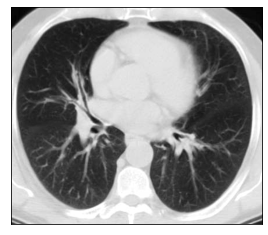

In [ ]:
plt.imshow(grayimg,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg.shape)

Text(0.5, 1.0, 'Distribution of intensity values (Zoomed In)')

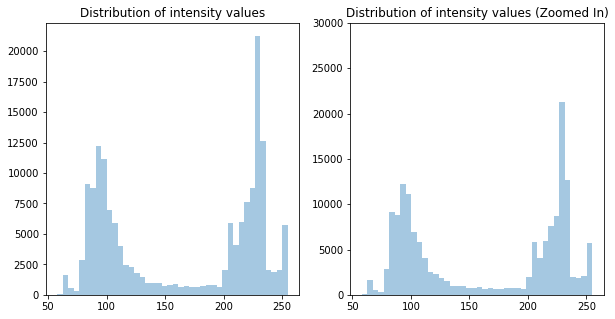

In [ ]:
#Okay let's look at the distribution of the intensity values of all the pixels
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(grayimg.flatten(),kde=False)#This is to flatten the matrix and put the intensity values of all the pixels in one single row vector
plt.title('Distribution of intensity values')

#To zoom in on the distribution and see if there is more than one prominent peak 
plt.subplot(1,2,2)
sns.distplot(grayimg.flatten(),kde=False) 
plt.ylim(0,30000) 
plt.title('Distribution of intensity values (Zoomed In)')

In [ ]:
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(grayimg)
print('The optimal seperation value is',thresh_val)

The optimal seperation value is 162


In [ ]:
mask=np.where(grayimg>thresh_val,1,0)

Text(0.5, 1.0, 'Mask')

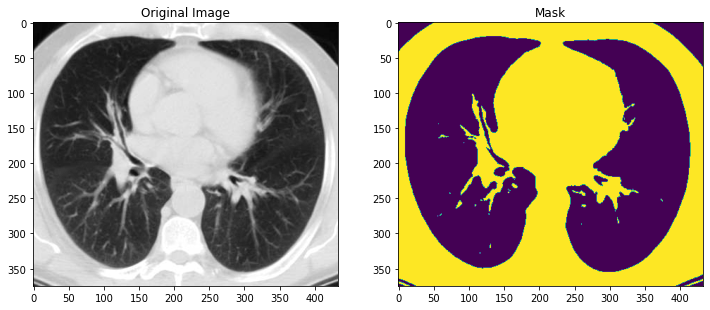

In [ ]:
#To plot the original image and mask side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
maskimg = mask.copy()
plt.imshow(maskimg, cmap='viridis')
plt.title('Mask')

Text(0.5, 1.0, 'Mask with Otsu Seperation')

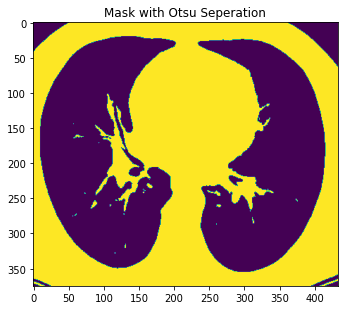

In [ ]:

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2) #2 as we're still trying to seperate the lighter coloured nuclei from the darker coloured background 
kmeans.fit(grayimg.reshape(grayimg.shape[0]*grayimg.shape[1],1))

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.imshow(maskimg, cmap='viridis')
plt.title('Mask with Otsu Seperation')

Text(0.5, 1.0, 'Sobel Y (horizontal edges)')

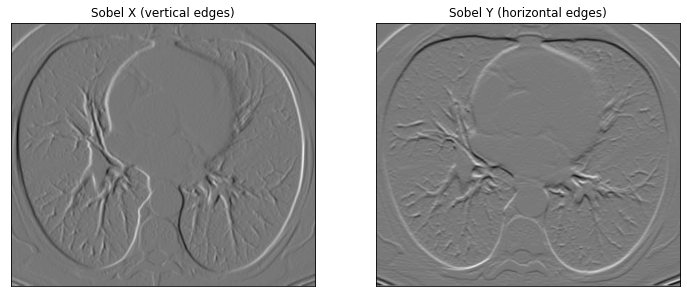

In [ ]:
sobelx = cv2.Sobel(grayimg,int(cv2.CV_64F),1,0,ksize=3) #ksize=3 means we'll be using the 3x3 Sobel filter
sobely = cv2.Sobel(grayimg,int(cv2.CV_64F),0,1,ksize=3)

#To plot the vertical and horizontal edge detectors side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X (vertical edges)')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(sobely,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Sobel Y (horizontal edges)')

Text(0.5, 1.0, 'Sobel Filter')

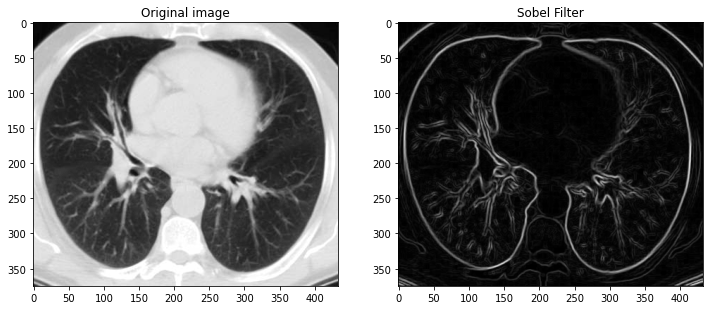

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original image')

#Now to combine the 2 sobel filters
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
plt.subplot(1,2,2)
plt.imshow(sobel,cmap='gray')
plt.title('Sobel Filter')